### Code untuk di Jupyter notebook

In [1]:
%cd D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [70 30]

D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [70 30]


In [2]:
%ls

 Volume in drive D is Data
 Volume Serial Number is BC6D-4CE5

 Directory of D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [70 30]

13/12/2022  23:50    <DIR>          .
13/12/2022  23:50    <DIR>          ..
13/12/2022  23:54        19.046.272 model_K1S3.h5
13/12/2022  23:54        40.866.738 model_svm_K2S3.pkl
13/12/2021  14:33    <DIR>          testing
13/12/2021  14:33    <DIR>          training
               2 File(s)     59.913.010 bytes
               4 Dir(s)  531.544.342.528 bytes free


In [3]:
base_dataset = 'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/'

In [4]:
# inisialisasi direktori data train dan train beserta data per kategori
dir1 = [r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/training/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/testing/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/training/benign nevi/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/testing/benign nevi/']

In [5]:
%matplotlib inline
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten, Dropout, Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pickle

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import auc, roc_curve

In [6]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size)
    img_arr = (np.array(nimg))
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.JPG') or f.endswith('.JPEG')]

def preprocess_norm(img_path):
    im = Image.open(img_path)
    X = preprocess(im,(224,224))
    X = reshape([X])
    info = np.iinfo(X.dtype) # informasi tipe data
    data = X.astype(np.float32) / info.max # normalisasi data to 0 - 1
    #print("data image before extract: ", data)
    return data

In [7]:
def features_labels_extract(list_dir):
    features = []
    labels = []
    for direktori in list_dir:
        img_list = get_imlist(direktori)
        for i, img_path in enumerate(img_list):
            data = preprocess_norm(img_path)
            img_name = os.path.split(img_path)[1]
            features.append(data)
            if 'AM ' in img_name:
                labels.append('acral melanoma')
            else:
                labels.append('benign nevi')
            print("extracting feature from image No. %d , %d images in total" %((i+1), len(img_list)))
    return np.array(features), np.array(labels)

dir_training = [dir1[0], dir1[2]]
x_train, y_train = features_labels_extract(dir_training)

extracting feature from image No. 1 , 245 images in total
extracting feature from image No. 2 , 245 images in total
extracting feature from image No. 3 , 245 images in total
extracting feature from image No. 4 , 245 images in total
extracting feature from image No. 5 , 245 images in total
extracting feature from image No. 6 , 245 images in total
extracting feature from image No. 7 , 245 images in total
extracting feature from image No. 8 , 245 images in total
extracting feature from image No. 9 , 245 images in total
extracting feature from image No. 10 , 245 images in total
extracting feature from image No. 11 , 245 images in total
extracting feature from image No. 12 , 245 images in total
extracting feature from image No. 13 , 245 images in total
extracting feature from image No. 14 , 245 images in total
extracting feature from image No. 15 , 245 images in total
extracting feature from image No. 16 , 245 images in total
extracting feature from image No. 17 , 245 images in total
extrac

extracting feature from image No. 156 , 245 images in total
extracting feature from image No. 157 , 245 images in total
extracting feature from image No. 158 , 245 images in total
extracting feature from image No. 159 , 245 images in total
extracting feature from image No. 160 , 245 images in total
extracting feature from image No. 161 , 245 images in total
extracting feature from image No. 162 , 245 images in total
extracting feature from image No. 163 , 245 images in total
extracting feature from image No. 164 , 245 images in total
extracting feature from image No. 165 , 245 images in total
extracting feature from image No. 166 , 245 images in total
extracting feature from image No. 167 , 245 images in total
extracting feature from image No. 168 , 245 images in total
extracting feature from image No. 169 , 245 images in total
extracting feature from image No. 170 , 245 images in total
extracting feature from image No. 171 , 245 images in total
extracting feature from image No. 172 , 

extracting feature from image No. 145 , 262 images in total
extracting feature from image No. 146 , 262 images in total
extracting feature from image No. 147 , 262 images in total
extracting feature from image No. 148 , 262 images in total
extracting feature from image No. 149 , 262 images in total
extracting feature from image No. 150 , 262 images in total
extracting feature from image No. 151 , 262 images in total
extracting feature from image No. 152 , 262 images in total
extracting feature from image No. 153 , 262 images in total
extracting feature from image No. 154 , 262 images in total
extracting feature from image No. 155 , 262 images in total
extracting feature from image No. 156 , 262 images in total
extracting feature from image No. 157 , 262 images in total
extracting feature from image No. 158 , 262 images in total
extracting feature from image No. 159 , 262 images in total
extracting feature from image No. 160 , 262 images in total
extracting feature from image No. 161 , 

In [8]:
dir_test = [dir1[1], dir1[3]]
x_test, y_test = features_labels_extract(dir_test)

extracting feature from image No. 1 , 105 images in total
extracting feature from image No. 2 , 105 images in total
extracting feature from image No. 3 , 105 images in total
extracting feature from image No. 4 , 105 images in total
extracting feature from image No. 5 , 105 images in total
extracting feature from image No. 6 , 105 images in total
extracting feature from image No. 7 , 105 images in total
extracting feature from image No. 8 , 105 images in total
extracting feature from image No. 9 , 105 images in total
extracting feature from image No. 10 , 105 images in total
extracting feature from image No. 11 , 105 images in total
extracting feature from image No. 12 , 105 images in total
extracting feature from image No. 13 , 105 images in total
extracting feature from image No. 14 , 105 images in total
extracting feature from image No. 15 , 105 images in total
extracting feature from image No. 16 , 105 images in total
extracting feature from image No. 17 , 105 images in total
extrac

extracting feature from image No. 89 , 112 images in total
extracting feature from image No. 90 , 112 images in total
extracting feature from image No. 91 , 112 images in total
extracting feature from image No. 92 , 112 images in total
extracting feature from image No. 93 , 112 images in total
extracting feature from image No. 94 , 112 images in total
extracting feature from image No. 95 , 112 images in total
extracting feature from image No. 96 , 112 images in total
extracting feature from image No. 97 , 112 images in total
extracting feature from image No. 98 , 112 images in total
extracting feature from image No. 99 , 112 images in total
extracting feature from image No. 100 , 112 images in total
extracting feature from image No. 101 , 112 images in total
extracting feature from image No. 102 , 112 images in total
extracting feature from image No. 103 , 112 images in total
extracting feature from image No. 104 , 112 images in total
extracting feature from image No. 105 , 112 images 

In [9]:
reshaped_x_train = x_train.reshape(x_train.shape[0],x_train.shape[2], x_train.shape[3], x_train.shape[4])
reshaped_x_test = x_test.reshape(x_test.shape[0],x_test.shape[2], x_test.shape[3], x_test.shape[4])
reshaped_x_train.shape

(507, 224, 224, 3)

In [10]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [11]:
class FeatureExtractor:
    def __init__(self):
        inputs = Input(shape=(224,224,3))
      
        conv1 = Conv2D(32, kernel_size=3, strides = 1, activation='relu')(inputs)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        
        conv1 = Conv2D(64, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(128, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(256, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(512, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        flat = Flatten()(pool1)
        drop_out = Dropout(0.5)(flat)
        dense = Dense(1, activation='sigmoid')(drop_out)
        self.model = Model(inputs=inputs, outputs=dense)
        self.model.summary()
 
    def fit(self, x_train, y_train):
        self.model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])
        self.model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1)

In [12]:
model = FeatureExtractor()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0     

In [13]:
model.fit(reshaped_x_train, y_train)

Epoch 1/50
16/16 [==============================] - 8s 211ms/step - loss: 0.7047 - accuracy: 0.4714
Epoch 2/50
16/16 [==============================] - 2s 96ms/step - loss: 0.6941 - accuracy: 0.5010
Epoch 3/50
16/16 [==============================] - 2s 98ms/step - loss: 0.6916 - accuracy: 0.5128
Epoch 4/50
16/16 [==============================] - 2s 94ms/step - loss: 0.6801 - accuracy: 0.6292
Epoch 5/50
16/16 [==============================] - 2s 95ms/step - loss: 0.6935 - accuracy: 0.5404
Epoch 6/50
16/16 [==============================] - 2s 96ms/step - loss: 0.6591 - accuracy: 0.5700
Epoch 7/50
16/16 [==============================] - 2s 94ms/step - loss: 0.6557 - accuracy: 0.5700
Epoch 8/50
16/16 [==============================] - 2s 96ms/step - loss: 0.6310 - accuracy: 0.6726
Epoch 9/50
16/16 [==============================] - 2s 95ms/step - loss: 0.6287 - accuracy: 0.5878
Epoch 10/50
16/16 [==============================] - 2s 96ms/step - loss: 0.5676 - accuracy: 0.6824 1s - los

In [14]:
featured_model = Model(inputs=model.model.input, outputs=model.model.layers[-2].output)

In [15]:
model.model.save('model_K1S3.h5')

In [16]:
x_test = featured_model.predict(reshaped_x_test)
print(x_test)

[[0.         0.07793993 0.07688963 ... 0.         0.93911046 0.25941047]
 [0.         0.67969126 0.17586195 ... 0.         0.3817982  0.        ]
 [0.         0.00879578 0.         ... 0.         0.31361708 0.03967305]
 ...
 [0.         0.         0.0032127  ... 0.         0.09995732 0.01339337]
 [0.         0.00317901 0.00578533 ... 0.         0.09973747 0.01395803]
 [0.         0.02860993 0.03101483 ... 0.         0.07852753 0.00318642]]


In [17]:
x_train = featured_model.predict(reshaped_x_train)
print(x_train)

[[0.         0.44987193 0.         ... 0.         0.         0.        ]
 [0.         0.1349804  0.         ... 0.         0.         0.94592375]
 [0.         0.         0.05960639 ... 0.         0.21415569 0.04466418]
 ...
 [0.         0.         0.         ... 0.         0.09602701 0.0761943 ]
 [0.         0.         0.         ... 0.         0.13701889 0.00750086]
 [0.         0.00831764 0.         ... 0.         0.12392166 0.01714892]]


In [18]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
              'C':[0.01,0.1,1, 10, 100, 1000],
              'gamma':[1e-1,1e-2,1e-3, 1e-4, 1e-5]}
clf = GridSearchCV(SVC(), parameters, verbose=1)
modelsvm = clf.fit(x_train, y_train)

# svmclf = SVC(C=10, gamma=0.001, kernel='rbf')
# modelsvm = svmclf.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [19]:
modelsvm.best_estimator_

SVC(C=1000, gamma=1e-05)

In [20]:
y_testSVM = modelsvm.predict(x_test)

y_pred = (y_testSVM > 0.5).astype(int)
target_names = ['acral melanoma', 'benign nevi']
print(classification_report(y_test, y_pred, target_names=target_names))

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('acc score : ', modelsvm.score(x_test,y_test))

                precision    recall  f1-score   support

acral melanoma       0.85      0.81      0.83       105
   benign nevi       0.83      0.87      0.85       112

      accuracy                           0.84       217
     macro avg       0.84      0.84      0.84       217
  weighted avg       0.84      0.84      0.84       217

Confusion Matrix
[[85 20]
 [15 97]]
acc score :  0.8387096774193549


In [21]:
print('acc score data train: ', modelsvm.score(x_train,y_train))
print('acc score data test: ', modelsvm.score(x_test,y_test))

acc score data train:  0.9546351084812623
acc score data test:  0.8387096774193549


In [22]:
# Save model
with open('model_svm_K2S3.pkl', 'wb') as file:
    pickle.dump(modelsvm, file)

C:\Users\Fadhlan\Anaconda3\envs\tf2.6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


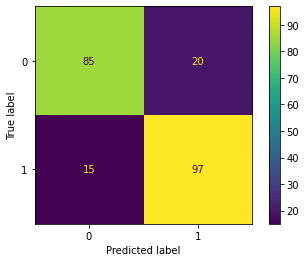

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelsvm, x_test, y_test)  
#plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/features/Skenario 2 - [80 20]/cm-skenario-2.svg')
plt.show()

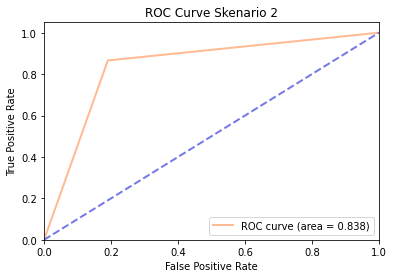

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Skenario 2')
plt.legend(loc="lower right")
#plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/features/Skenario 2 - [80 20]/roc-curve-skenario-2.svg')
plt.show()